# Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
# loading the csv file
df = pd.read_csv("/content/drive/MyDrive/P2_HotelAnalysis/data/hotel_bookings.csv")

# Exploratory Data Analysis and Data Cleaning

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [7]:
print(f' File contains {df.shape[0]} rows and {df.shape[1]} columns.')

 File contains 119390 rows and 32 columns.


In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Converting string dates into real datetime values
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [11]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
# To check the total number of null values in each column
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [14]:
# Deleting company & agent columns, and deleting rows with  missing values
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [17]:
# Removing outliers where adr ≥ 5000
df = df[df['adr']<5000]

# Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


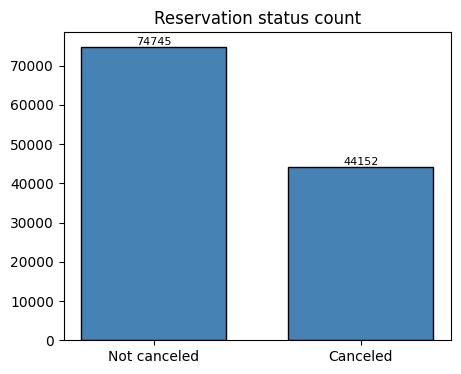

In [18]:
# Calculating percentage split between canceled and not canceled hotels
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

# Bar chart showing the count split.
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
bars = plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7
        , color='#4682B4')

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,   # x position (middle of bar)
             height + 100,                      # y position (slightly above bar)
             str(height),                       # actual number
             ha='center', va='bottom', fontsize=8)

plt.show()

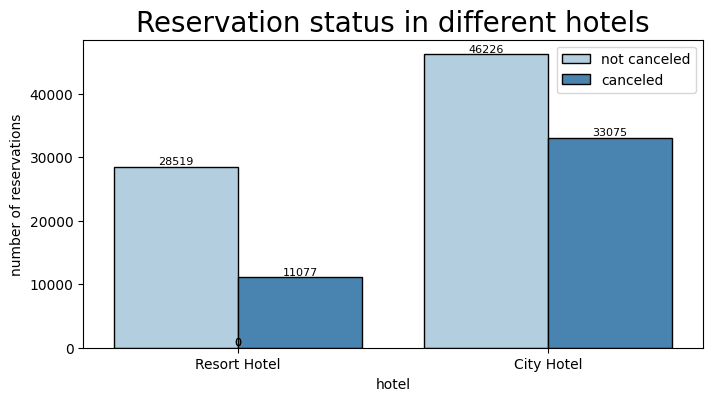

In [19]:
# Plotting a barchart of grouped countplot
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, edgecolor = 'k', palette = 'Blues')

legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))

plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])

# Add numbers above the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,   # x position (middle of the bar)
             height + 50,                   # y position (slightly above bar)
             int(height),                   # the actual count value
             ha='center', va='bottom', fontsize=8)

plt.show()


In [20]:
# Calculating cancellation rate(%) for the Resort Hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [21]:
# Calculating cancellation rate(%) for the City Hotel
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.582918
1,0.417082


In [22]:
# Time-series data of average daily rates for each hotel type
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

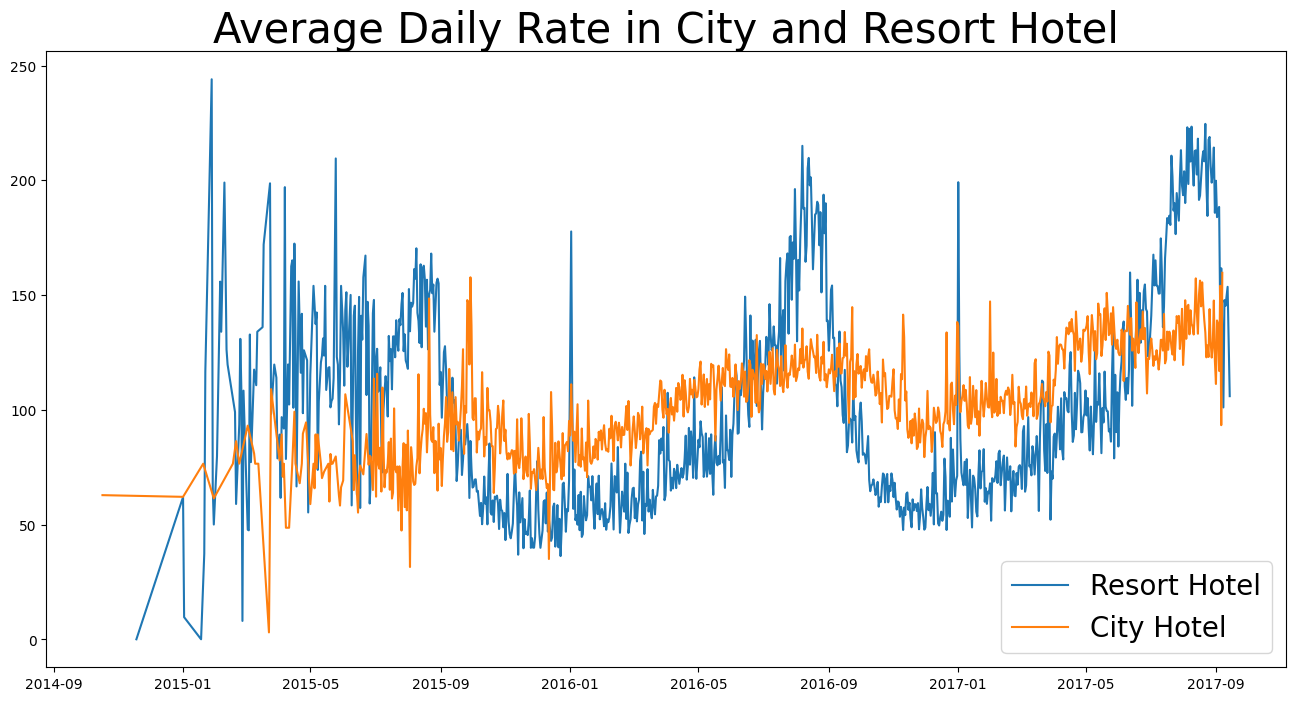

In [23]:
# Time-series comparison of ADR for both the hotel types
plt.figure(figsize = (16,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

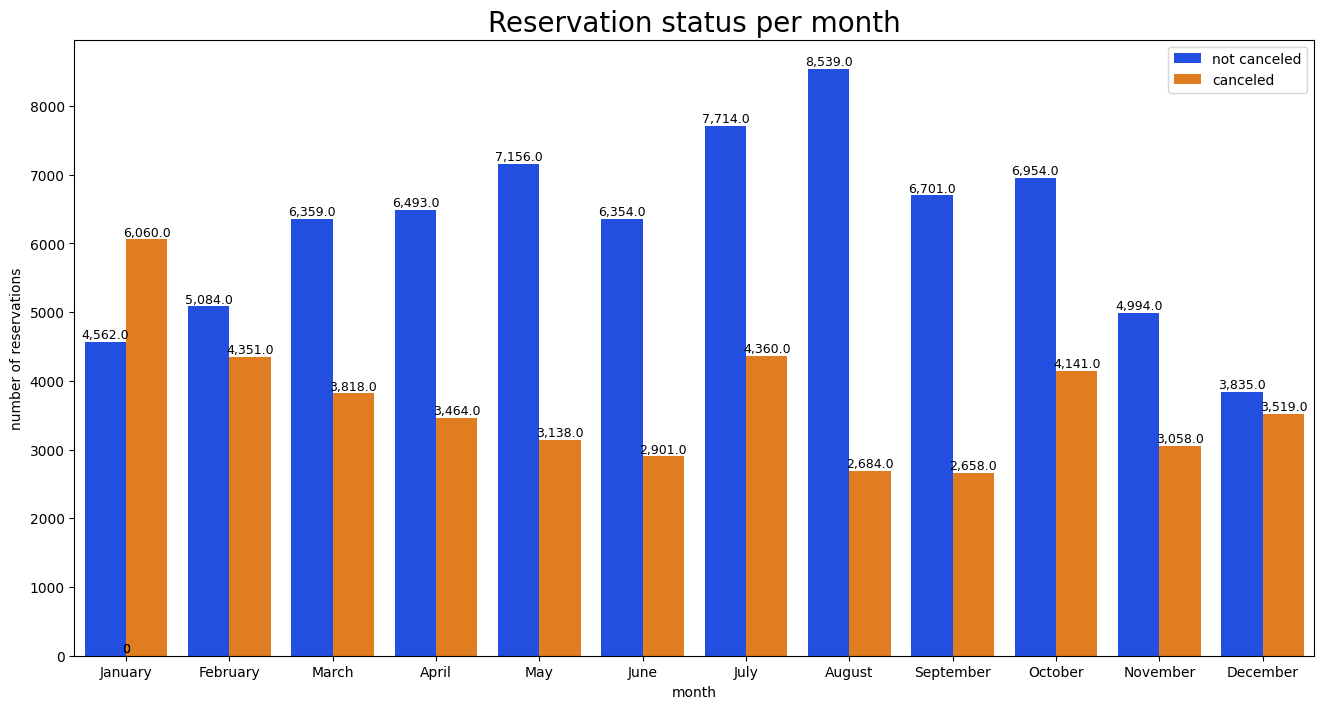

In [24]:
# Total reservations per month & split between canceled and not canceled bookings

# Extract month names
df['month'] = df['reservation_status_date'].dt.month_name()
order = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']

plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright', order=order)
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))

plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                 textcoords='offset points')

plt.show()

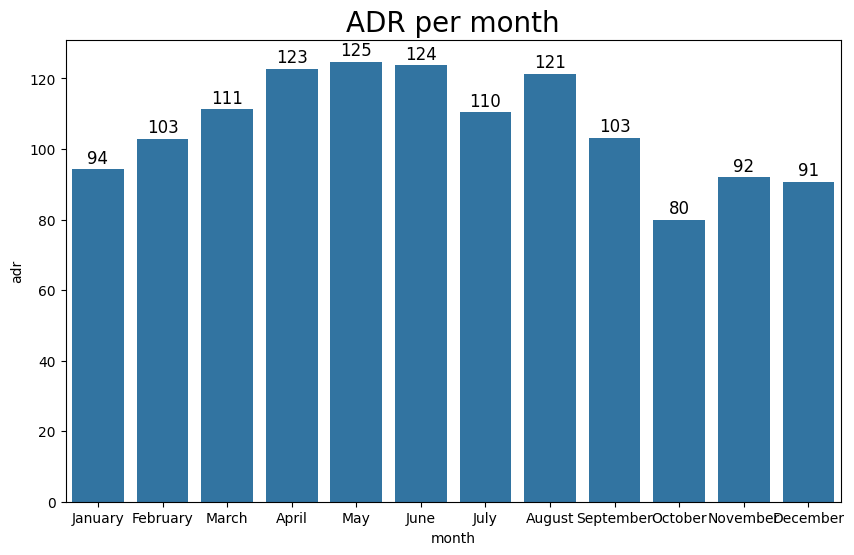

In [25]:
# Plotting ADR per month for canceled bookings using a barplot

# Extract month names
df['month'] = df['reservation_status_date'].dt.month_name()
order = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']

# Prepare data: mean ADR per month for canceled bookings
monthly_adr = df[df['is_canceled'] == 1].groupby('month')[['adr']].mean().reset_index()

plt.figure(figsize = (10,6))
plt.title('ADR per month', fontsize = 20)

ax = sns.barplot(x='month', y='adr', data = monthly_adr, order=order)

# Add numbers above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0,8), textcoords='offset points')

plt.show()

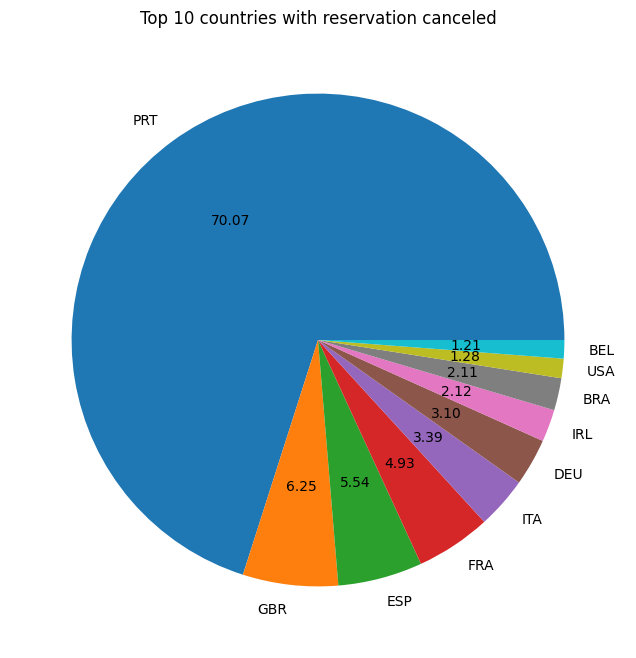

In [26]:
# Creating a pie chart of the top 10 countries with canceled reservations
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [27]:
# Number of bookings by Market segment
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [28]:
# Percentage of bookings by Market segment
df['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [29]:
# Percentage of cancelled bookings by Market segment
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


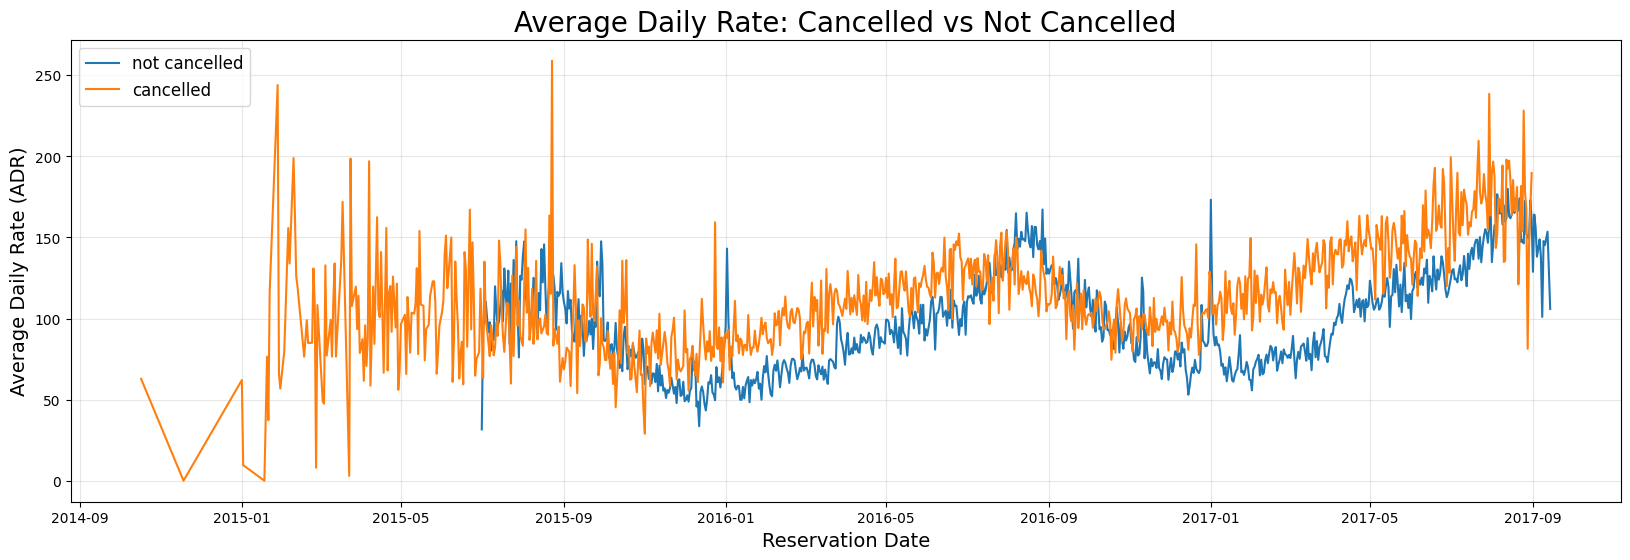

In [30]:
# Create average adr for canceled bookings
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

# Create average adr for not canceled bookings
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

# Comparing ADR trends between canceled vs not canceled bookings across time
plt.figure(figsize = (20,6))

plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')

plt.title('Average Daily Rate: Cancelled vs Not Cancelled', fontsize=20)
plt.xlabel('Reservation Date', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [31]:
# ADR behavior between 2016 and August 2017
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

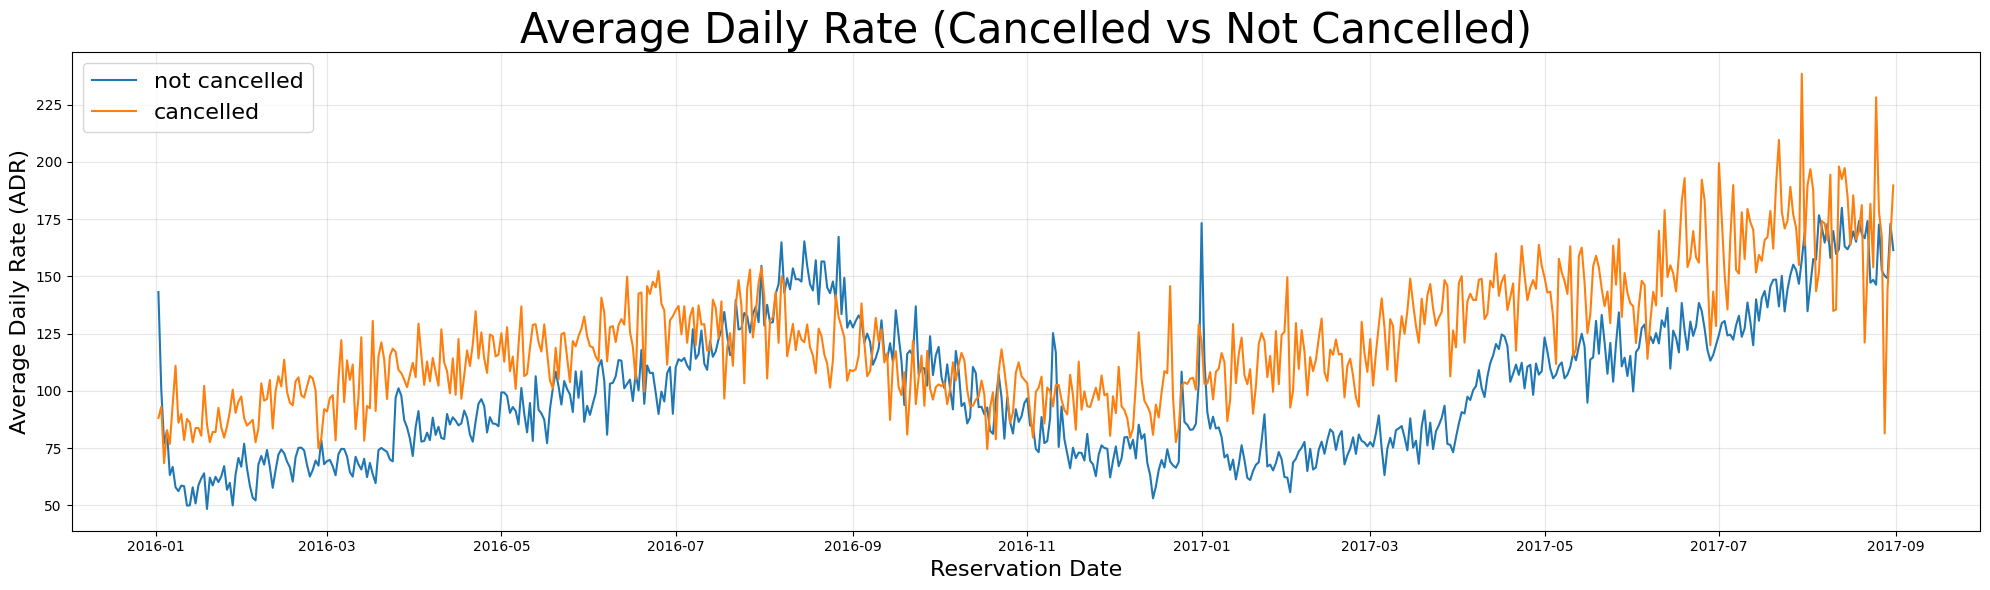

In [32]:
# Comparing ADR trends for canceled vs not canceled bookings between 2016 and 2017-09
plt.figure(figsize = (20,6))
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')

plt.title('Average Daily Rate (Cancelled vs Not Cancelled)', fontsize=30)
plt.xlabel('Reservation Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# Deposit Types

# Percentage distribution of Deposit type
df['deposit_type'].value_counts(normalize=True) * 100

,proportion
deposit_type,
No Deposit,87.607761
Non Refund,12.255986
Refundable,0.136252


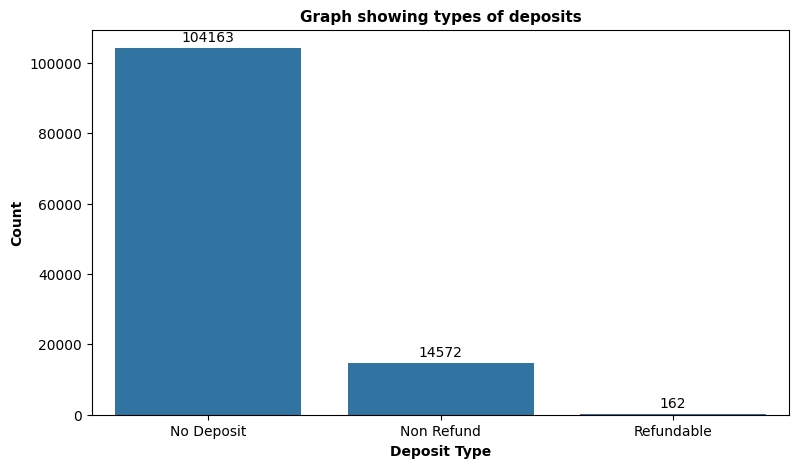

In [43]:
# Plotting the graph showing the count of different types of deposit
plt.figure(figsize=(9,5))
ax = sns.countplot(
    data=df,
    x='deposit_type',
    order=df['deposit_type'].value_counts().index
)
# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',                 # The count
        (p.get_x() + p.get_width()/2., p.get_height()),  # Position: center top
        ha='center', va='center', fontsize=10, color='black',
        xytext=(0,8), textcoords='offset points'   # Small offset above the bar
    )

plt.title('Graph showing types of deposits', fontsize = 11 , weight= 'bold')
plt.ylabel('Count' , weight= 'bold')
plt.xlabel('Deposit Type', weight= 'bold' )
plt.show()